In [1]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score, KFold, TimeSeriesSplit


In [2]:
features = sorted([
    'ADX',
    'ADXR',
    'APO',
    'AROON_aroondown',
    'AROON_aroonup',
    'AROONOSC',
    'CCI',
    'DX',
    'MACD_macd',
    'MACD_macdsignal',
    'MACD_macdhist',
    'MFI',
    'MINUS_DI',
    'MINUS_DM',
    'MOM',
    'PLUS_DI',
    'PLUS_DM',
    'RSI',
    'STOCH_slowk',
    'STOCH_slowd',
    'STOCHF_fastk',
    'STOCHRSI_fastd',
    'ULTOSC',
    'WILLR',
    'ADOSC',
    'NATR',
    'HT_DCPERIOD',
    'HT_DCPHASE',
    'HT_PHASOR_inphase',
    'HT_PHASOR_quadrature',
    'HT_TRENDMODE',
    'BETA',
    'LINEARREG',
    'LINEARREG_ANGLE',
    'LINEARREG_INTERCEPT',
    'LINEARREG_SLOPE',
    'STDDEV',
    'BBANDS_upperband',
    'BBANDS_middleband',
    'BBANDS_lowerband',
    'DEMA',
    'EMA',
    'HT_TRENDLINE',
    'KAMA',
    'MA',
    'MIDPOINT',
    'T3',
    'TEMA',
    'TRIMA',
    'WMA',
])

# features = ['ADX', 'ADXR', 'AROONOSC', 'AROON_aroondown', 'AROON_aroonup', 'BETA', 'CCI', 'DX', 'HT_DCPERIOD', 'HT_TRENDMODE', 'MFI', 'RSI', 'STOCHF_fastk', 'STOCH_slowd', 'STOCH_slowk', 'ULTOSC', 'WILLR']

dfは特徴量が入ったDataFrame
featuresは使う特徴量カラム名配列
重要度表示。重要度が高いものは汎化性能に悪影響を与える可能性がある
[0.90161131 0.90098255]
delete:  NATR
[0.77991327 0.7805764 ]
delete:  ADOSC
[0.75354454 0.7522512 ]
delete:  PLUS_DM
[0.75241601 0.75106262]
delete:  MINUS_DM
[0.72309406 0.7182948 ]
delete:  STDDEV
[0.71958483 0.71599214]
delete:  MINUS_DI
[0.71449041 0.71110092]
delete:  KAMA
[0.71263591 0.70808272]
delete:  PLUS_DI
[0.70518678 0.70208744]
delete:  MACD_macdsignal
[0.70453063 0.70066773]
delete:  STOCHRSI_fastd
[0.69468662 0.69227421]
delete:  MACD_macd
[0.69395151 0.69086675]
delete:  EMA
[0.6919444  0.68997337]
delete:  BBANDS_upperband
[0.68949133 0.68731664]
delete:  BBANDS_lowerband
[0.68997316 0.6849685 ]
delete:  DEMA
[0.68736947 0.68342725]
delete:  MACD_macdhist
[0.68414657 0.67848878]
delete:  TEMA
[0.67747237 0.67455984]
delete:  APO
[0.67809475 0.67346594]
delete:  MA
[0.67413551 0.67065132]
delete:  TRIMA
[0.67166742 0.66891681]
delete:  HT_TRENDLINE
[0.67122256 0.66780007]
delete:  WMA
[0.666756

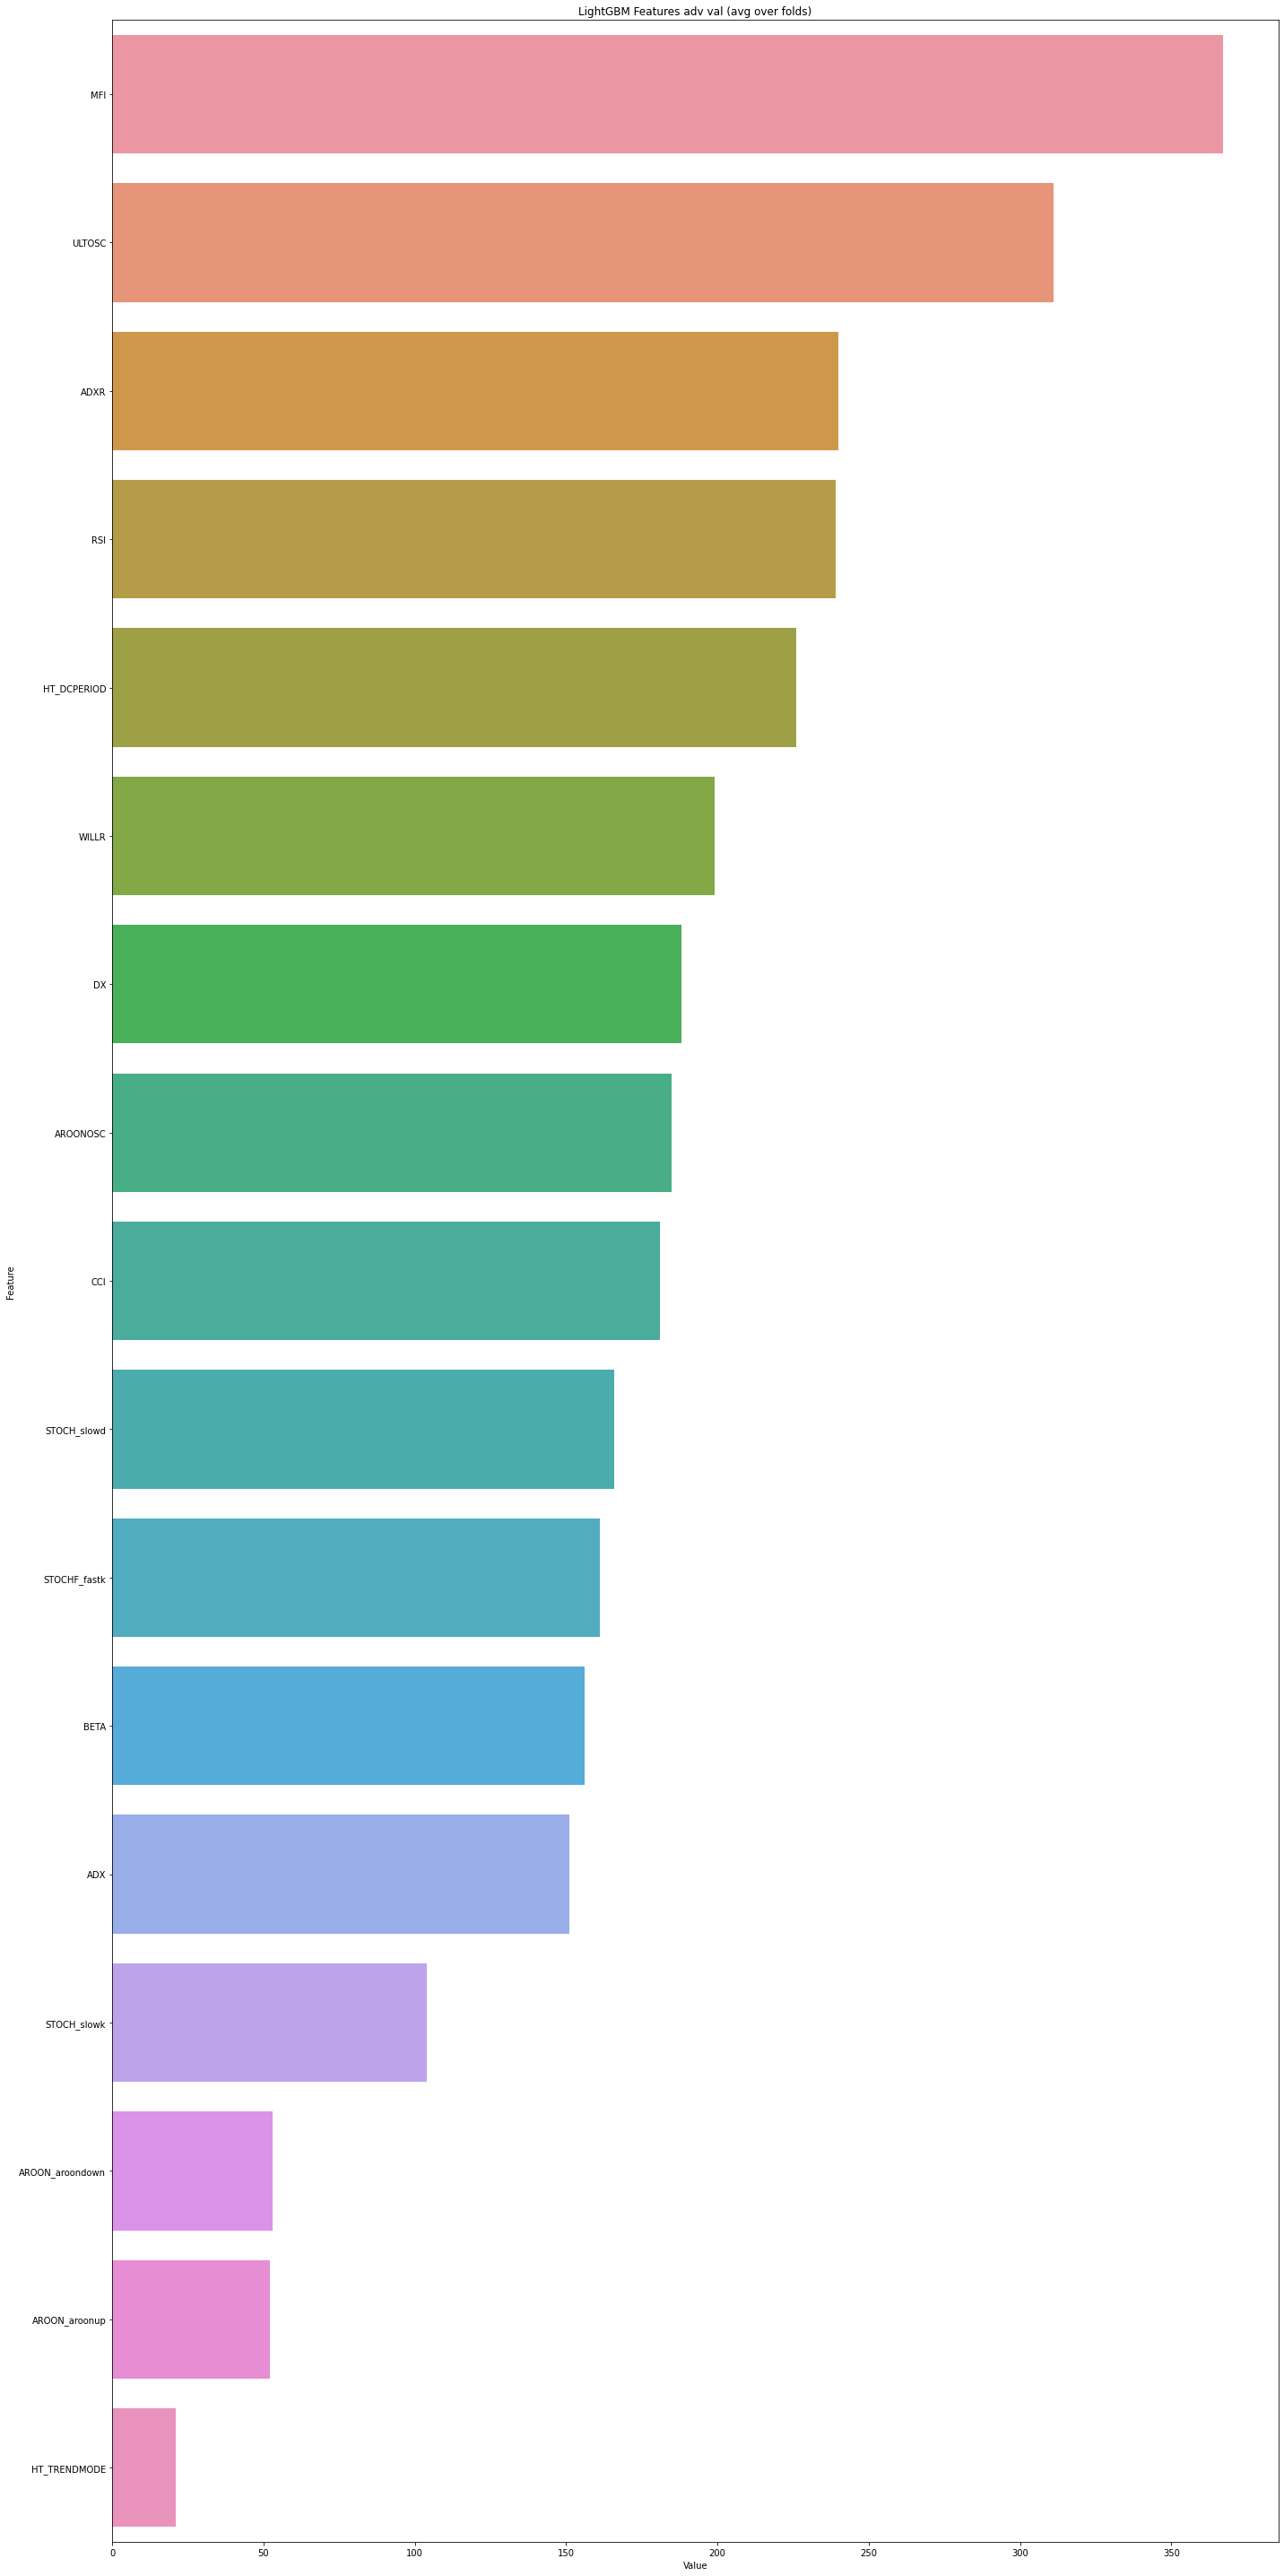

スコア計算。スコアが高いと汎化性能が悪い可能性ある (目安は0.3以下)
scores [0.11139282 0.11129311]
score mean, std 0.11134296784311115 4.985571748183926e-05


In [3]:
df = pd.read_pickle('df_features.pkl')

print('dfは特徴量が入ったDataFrame')
print('featuresは使う特徴量カラム名配列')

print('重要度表示。重要度が高いものは汎化性能に悪影響を与える可能性がある')
model = lgb.LGBMRegressor(n_jobs=-1, random_state=1)

while True:
  model.fit(df[features], np.arange(df.shape[0]))
  lgbm_adv_importance = model.feature_importances_
  feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, features)), columns=['Value','Feature'])

  cv = KFold(n_splits=2, shuffle=True, random_state=0)
  scores = cross_val_score(model, df[features], np.arange(df.shape[0]), scoring='r2', cv=cv)
  print(scores)
  if scores[0] < 0.3 and scores[1] < 0.3:
    break
  else:
    print("delete: ",feature_imp.iloc[-1,1])
    features.remove(feature_imp.iloc[-1,1])

model.fit(df[features], np.arange(df.shape[0]))
lgbm_adv_importance = model.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, features)), columns=['Value','Feature'])
print(features)
plt.figure(figsize=(20, 40))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features adv val (avg over folds)')
plt.tight_layout()
plt.show()

print('スコア計算。スコアが高いと汎化性能が悪い可能性ある (目安は0.3以下)')
cv = KFold(n_splits=2, shuffle=True, random_state=0)
scores = cross_val_score(model, df[features], np.arange(df.shape[0]), scoring='r2', cv=cv)
print('scores', scores)
print('score mean, std', np.mean(scores), np.std(scores))
